## Déterminer la prochaine valeur d’un cours de bourse 



Le framework Tensorflow permet d’estimer la prochaine valeur d’une série temporelle, un cours de bourse par exemple.
Le principe est le suivant :
- à partir d’une liste de X valeurs, le modèle va déterminer la valeur X+1 la plus probable.
- Je tiens à préciser qu’il s’agit uniquement d’un tutoriel présentant les concepts et le fonctionnement. Il n’y a aucune optimisation et le jeu de données est assez faible (~2300 valeurs).

## Sommaire


- Les données du cours de bourse de Google & AMD
- Développons notre IA !
-  Préparer les données
- Créer un modèle d’apprentissage pour les données temporalles
- Exécuter l’apprentissage
- Utiliser le modèle

## Données de bourse d Google et AMD



Comme déjà expliqué dans des articles précédents, le point le plus compliqué dans la création d’une IA est d’avoir de la donnée, et suffisamment pour obtenir un résultat correct. Dans notre exemple, nous allons utiliser un échantillon des cours de bourse de Google et AMD. Ils contiennent environ 2 300 lignes, soit 1 par jour.

Le fichier « GOOGL.csv » contient les informations détaillées. Dans notre exemple, nous allons uniquement exploitée le cours de fermeture du jour X pour estimer celui du jour X+1.

## Développons notre IA



Les paraphes suivants présentent les grandes étapes de notre programme en tensorflow.

- Préparer les données

Cette phrase consiste obtenir des données utilisables par tensorflow. C’est la phase la plus longue du programme !


In [113]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys

print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")

notebookstart= time.time()

Tensorflow Version: 2.14.0
Pandas Version: 2.0.3
Numpy Version: 1.24.3
System Version: 3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]


In [114]:
import pandas as pd
dataframe = pd.read_csv('datasets/cours_bourse/cours_4.csv',
                        index_col="Date",
                        parse_dates=True)

In [3]:
import pandas as pd
dataframe = pd.read_csv('datasets/GOOGL.csv', index_col="Date", parse_dates=True)

In [115]:
dataframe.head()

,Open,High,Low,Close,Volume
Date,,,,,
2002-07-01 15:30:00,54.37,55.17,54.07,54.70,870456
2002-07-02 15:30:00,54.58,54.75,53.63,53.78,961467
2002-07-03 15:30:00,53.76,54.96,53.58,53.99,2370174
2002-07-04 15:30:00,54.16,54.55,53.66,53.76,1034747
2002-07-05 15:30:00,53.96,54.12,52.80,53.01,2140759


In [116]:
dataframe.shape

(4588, 5)

Si notre fichier contient par exemple 2300 lignes. Nous allons utiliser 2000 lignes pour entrainer notre IA et 300 lignes pour la tester pendant l entrainement.
Seule le prix de cloture est utilisé.
C est notre cible ou target



Le fichier contient environ 2 300 lignes, nous allons utiliser 2 000 lignes pour entraîner l’IA et 300 lignes pour la tester durant son entrainement. Seul le prix de clôture est utilisé.

In [117]:
# close_serie = dataframe["Close"]
close_data = dataframe["Close"]

In [118]:
# close_serie
close_data

Date
2002-07-01 15:30:00      54.70
2002-07-02 15:30:00      53.78
2002-07-03 15:30:00      53.99
2002-07-04 15:30:00      53.76
2002-07-05 15:30:00      53.01
                        ...   
2021-01-19 15:30:00    2016.40
2021-01-20 15:30:00    2054.70
2021-01-21 15:30:00    2099.40
2021-01-22 15:30:00    2049.60
2021-01-25 15:30:00    1941.00
Name: Close, Length: 4588, dtype: float64

In [119]:
# train_values = close_serie.values
train_values = close_data.values

In [120]:
train_values

array([  54.7 ,   53.78,   53.99, ..., 2099.4 , 2049.6 , 1941.  ])

In [121]:
train_values.shape

(4588,)

In [122]:
close_data = dataframe["Close"]
train_values = close_data.values

In [123]:
close_data.values

array([  54.7 ,   53.78,   53.99, ..., 2099.4 , 2049.6 , 1941.  ])

## Normalisation des données

La normalisation permet de ramener toutes les données à une meme échelle entre 0 et 1.
Il existe plusieurs algorithmes pour normaliser. Nous utilisons MinMaxScaler de Scikit Learn



Notre exemple n’est pas le meilleur puisque nous n’avons qu’une donnée en entrée. L’important est de bien comprendre que la normalisation permet de ramener toutes les données à une même échelle. Notre prix de clôture a une échelle entre 0 et X, X étant inconnu. Après normalisation, l’échelle se situera forcément entre 0 et 1.

Pour normaliser les données, il existe plusieurs algorithmes algorithmes. Dans l’exemple, nous utilisons le « MinMaxScaler » fourni par Scikit Learn(oui, rien n’empêche de combiner les frameworks d’IA ;)). Il définie 1 comme étant la valeur la plus forte des données et calcul toutes les autres données de manière proportionnelle.



In [124]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# définir le scaler à partir de l'ensemble des données
scaler = min_max_scaler.fit(train_values.reshape(-1, 1))

# mise à l'échelle des données d'apprentissage et de test
train_values = scaler.transform(close_data.values[:4000].reshape(-1, 1)) # apprentissage
test_values = scaler.transform(close_data.values[4000:].reshape(-1, 1))  # test



In [88]:
# Méthode Standard scaler

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler().fit(train_values.reshape(-1, 1))
train_values = scaler.transform(close_data.values[:4000].reshape(-1, 1))
test_values = scaler.transform(close_data.values[4000:].reshape(-1,1))


In [76]:
# Méthode Robust Scaler

from sklearn.preprocessing import RobustScaler



scaler = RobustScaler().fit(train_values.reshape(-1, 1))
train_values = scaler.transform(close_data.values[:4000].reshape(-1, 1))
test_values = scaler.transform(close_data.values[4000:].reshape(-1, 1))


## Début

## 3 méthodes de mise à l'échelle

In [15]:
# Méthode Scaler MinMax utilisation et visualisation

from sklearn.preprocessing import MinMaxScaler

colonnes_names = dataframe.columns
features = dataframe[colonnes_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = colonnes_names)
scaled_features.head()

,Open,High,Low,Close,Volume
0,0.004171,0.023285,0.023401,0.004583,0.013344
1,0.004263,0.023108,0.023211,0.004179,0.014739
2,0.003903,0.023196,0.023189,0.004271,0.036335
3,0.004079,0.023023,0.023224,0.004171,0.015863
4,0.003991,0.022842,0.022852,0.003842,0.032818


In [19]:
# Méthode Standard scaler

from sklearn.preprocessing import StandardScaler

colonnes_names = dataframe.columns
features = dataframe[colonnes_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = colonnes_names)
scaled_features.head()

,Open,High,Low,Close,Volume
0,-1.124752,-1.125426,-1.122963,-1.124748,-0.942133
1,-1.124274,-1.126372,-1.123980,-1.126850,-0.924172
2,-1.126143,-1.125899,-1.124096,-1.126370,-0.646151
3,-1.125231,-1.126823,-1.123911,-1.126895,-0.909709
4,-1.125687,-1.127792,-1.125898,-1.128608,-0.691428


In [22]:
# Méthode Robust Scaler

from sklearn.preprocessing import RobustScaler

colonnes_names = dataframe.columns
features = dataframe[colonnes_names]

scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = colonnes_names)
scaled_features.head()

,Open,High,Low,Close,Volume
0,-1.584348,-1.567902,-1.621667,-1.605146,-0.940272
1,-1.583526,-1.569503,-1.623456,-1.608793,-0.915068
2,-1.586734,-1.568702,-1.623660,-1.607961,-0.524946
3,-1.585169,-1.570265,-1.623334,-1.608872,-0.894774
4,-1.585951,-1.571904,-1.626831,-1.611846,-0.588479


## Fin

In [125]:
train_values.shape

(4000, 1)

In [126]:
test_values.shape

(588, 1)

 De plus, nous appliquons un « reshape » qui va transformer le tableau de dimension 1 avec 2 000 valeurs en un tableau de 2 000 données avec 1 valeur (cas des données d’entrainement). Cette transformation est nécessaire car c’est le format attendu par tensorflow : [ 1, 2, 3 … X] => [ [1], [2], [3] … [X] ]

Découper les données en fenêtres

Pour rappel, notre IA va analyse un historique de X données pour apprendre la donnée X+1. Il est nécessaire de découper les données en 2 tableaux :
-  A = Un tableau de N fenêtres (tableau) contenant chacune X élément
-  B = Un tableau de N éléments correspondant au résultat X+1
La méthode suivante permet de faire cela.



In [127]:
def create_window(dataset, start_index, end_index, history_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)

    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i])

    return np.array(data), np.array(labels)


# Le paramètre history_size est la taille de la fenêtre d'information passée


Voici un exemple concret avec 10 valeurs en entrée et une taille d’historique de 5 valeurs.
- A est un tableau contenant 5 fenêtres (tableaux), chacune des fenêtre aura les valeurs en orange.
- B est le tableau des valeurs en vert.

C’est ce que nous faisons avec nos valeurs d’entrainement et de test.

In [128]:
# exemple 1

train_features, train_labels = create_window(train_values,0,None, 5)
test_features, test_labels = create_window(test_values,0,None,5)


In [154]:
train_features.shape

(3995, 5, 1)

3995 fenetres, 5 données, 1 valeur

In [156]:
train_features[3994:3995]

array([[[0.54280139],
        [0.53422357],
        [0.51997544],
        [0.51454195],
        [0.52010262]]])

In [157]:
close_data.values[3994:3995]

array([1282.])

In [49]:
# exemple 2

train_features, train_labels = create_window(dataset=train_values,
                                           start_index=0,
                                           end_index=None,
                                           history_size=5)
test_features, test_labels = create_window(dataset=test_values,
                                       start_index=0,
                                       end_index=None,
                                       history_size=5)


In [129]:
train_features.shape

(3995, 5, 1)

In [130]:
test_features.shape

(583, 5, 1)

- Nous obtenons ainsi un tableau à 3 dimensions (1 995 fenêtres, 5 données, 1 valeur).
- et ( 330 fenetres, 5 colonnes, 1 valeur)
Dernière étape, création des paramètres tensorflow

Un modèle tensorflow prend en entrée un « Dataset« , nous devons le construire.

In [131]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels)).batch(100).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels)).batch(100).repeat()

Nous noterons l’utilisation des méthodes « batch » découpant nos fenêtres d’entrées en lots. Il s’agit d’une optimisation pour tensorflow, il va traiter les données en parallèle.
- Le découpage prend les 1 995 et forme 19 lots de 100 fenêtre + 1 lot de 95 fenêtres.
La fonction « repeat » est obligatoire et permet d’obtenir un itérateur.

Nous sommes enfin prêt à créer notre modèle d’apprentissage automatisé 


##  Créer un modèle d’apprentissage pour des données temporelles

Il existe 2 types de modèles principaux pour l’apprentissage de données en série :
- LSTM : long short term memory, plus efficace sur du long terme
- GRU : gated recurrent unit, plus rapide mais moins efficace sur du long terme

Dans l’exemple, nous utiliserons LSTM.

In [132]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=(5, 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss= 'mae') # 'mean_squared_error'

Notre modèle est défini avec une couche LSTM à 8 unités prenant en entrée une fenêtre (5 valeurs X, 1 valeur X + 1). Le retour du LSTM n’est pas une simple valeur comprise entre 0 et 1, donc non comparable avec notre donnée de sortie X + 1. Nous appliquons donc une couche « dense » qui va calculer une unique valeur de sortie.

Pour finir, le modèle est compiler en précisant les fonctions à utiliser pour :
- Optimiser le calcul des paramètres du modèle, « adam » est un bon optimiseur pour LSTM
- Calculer la perte par rapport aux données attendues, cela dépend du type d’information de sortie attendue. Dans notre cas, une « mean_squared_error » est un bon choix.




## Lancer l’apprentissage

In [133]:
# early_stopping = EarlyStopping(monitor='val_loss', patience = 9, restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=20,
    steps_per_epoch=20,
    validation_data=test_dataset,
    validation_steps=3
)

Epoch 1/20
20/20 [==============================] - 5s 42ms/step - loss: 0.0653 - val_loss: 0.3878
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0576 - val_loss: 0.2144
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0956 - val_loss: 0.2102
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.2430
Epoch 5/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0681 - val_loss: 0.2321
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0294 - val_loss: 0.1794
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0678 - val_loss: 0.1718
Epoch 8/20
20/20 [==============================] - 0s 6ms/step - loss: 0.0279 - val_loss: 0.1542
Epoch 9/20
20/20 [==============================] - 0s 8ms/step - loss: 0.0561 - val_loss: 0.1409
Epoch 10/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0206 - val_loss: 0.1018
Epoch 11/20
20/20 

Il y a 3 valeurs importantes dont il faut connaitre le fonctionnement :
- epochs : nombre de fois où l’apprentissage va passer les données d’apprentissage pour améliorer les paramètres du modèle.
- steps_per_epoch : nombre de lot traités pour une « epoch », idéalement « taille des données d’entraînement » / « taille d’un lot » = 2 000 / 100 = 20. Si la valeur est supérieure, des lots seront passés plusieurs fois, ce qui revient à faire plus d »epoch ».

=> En tout notre modèle va être entraîné avec 10 * 20 = 200 passages
- validation_steps : même principe que « steps_per_epoch » mais pour les données de test.
- Nous avons donc « taille des données de test » / « taille d’un lot » = 300 / 100 = 3
=> C’est assez faible.

L’information de sortie de l’apprentissage sont des données statistiques. La fonction suivante permet de les afficher.



In [134]:

def plot_history(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.15])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

Le premier résultat à 10 epochs n’est pas très concluant, nous voyons bien que l’entrainement est trop court. Le passage à 20 epochs montrent un bien meilleur résultat.

4 – Utiliser le modèle

En dernier lieu, il convient d’utiliser notre modèle sur les données réelles.

Test sur les valeurs de Google

## Utiliser le modele

125/125 [==============================] - 1s 2ms/step


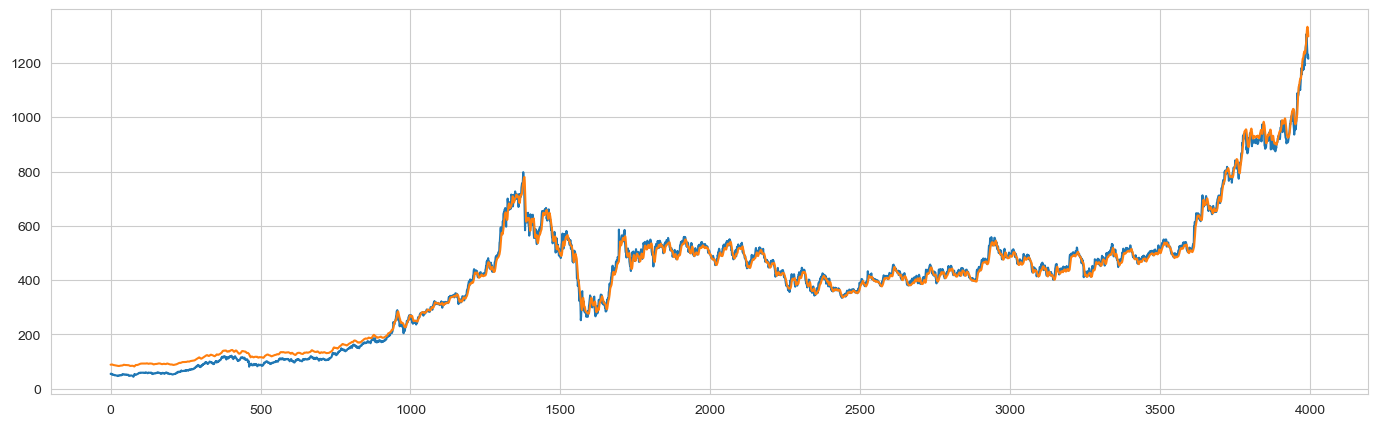

In [135]:
# Nous calculons simplement les prédictions à partir des données utilisées pour l’apprentissage
predictions = model.predict(train_features)

# nous remettons les valeurs à la bonne échelle via le « scaler 
unorm = np.reshape(scaler.inverse_transform(predictions), -1)

# affichons le résultat dans un graphique sur 300 données
# les 5 premières valeurs sont écartées car non estimable puisqu’il n’y a pas assez d’historique
plt.plot(close_data.values[5:4000])
# plt.plot(close_serie.values[5:305]) # données réelles
plt.grid(True)
plt.plot(unorm[0:4000]) # orange données estimées
plt.show()

In [138]:
unorm[2500] # prédiction

375.2292

In [139]:
close_data.values[2500] # réelle

366.29